# **Pràctica 2**

Christian Bevilacqua i Aregall

# 1. Descripció del dataset

El dataset amb el que treballem conté informació sobre les 50 publicacions més populars del subreddit r/popular, extretes mitjançant Web Scraping a través de la pràctica anterior (Pràctica 1). Aquest dataset és rellevant perquè reflecteix els interessos i les interaccions de la comunitat de Reddit en temps real. Hi ha diverses preguntes que es podrien respondre a partir de l’anàlisi d’aquestes dades, com ara són les següents:



1.   Quins subreddits tenen més representació entre els posts més populars?
2.   Quina relació hi ha entre un post i el seu nombre de vots?
1.   Quins temes atrauen més interacció en un moment temporal determinat?

**Les variables que conté el data set, a mode de resum, són les següents:**

*  **Posició:** Posició del post en el rànquing (1-50)
*  **Títol:**El títol del post
*  **Subreddit:** Subreddit d'origen de la publicació
*  **Autor:** Nom d'usuari de l'autor del post.
*  **Vots:** Nombre de vots que ha rebut el post.
*  **Enllaç\r:** URL directa a la publicació.

En quant al tamany, comentar que el dataset conté 29 observacions (1 per cada publicació popular i no hi arriben a 50 ja que en aquella data no hi havia tantes publicacions, encara que en el codi es pot veure que el limit està establit en 50) i un total de 6 variables cada observació.



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/My Drive/Colab Notebooks/

/content/drive/My Drive/Colab Notebooks


In [ ]:
import pandas as pd
df = pd.read_csv("reddit_trending_2025-04-08.csv", sep=';', lineterminator='\n')

In [ ]:
df.head()

,Posició,Títol,Subreddit,Autor,Vots,Enllaç\r
0,1,Trump to impose 50% additional tariffs on Chin...,StockMarket,RoyalChris,23903,https://i.redd.it/78sqwqccjfte1.png\r
1,2,Wingo Internet Deal! 🚀 Surfen mit bis zu 1 Gbi...,u_wingo-ch,wingo-ch,0,https://alb.reddit.com/cr?za=UksJga7zW0BnRrDD9...
2,3,"Shot of a lifetime, captured from a car window",nextfuckinglevel,solateor,49826,https://v.redd.it/hm34sgm2zite1\r
3,4,Elon Musk gets trolled while attempting to liv...,Fauxmoi,bipartisanic,45033,https://v.redd.it/oauuwxojgite1\r
4,5,Trump Orders Four Mile Military Parade for his...,politics,Ok-Direction-4480,33447,https://www.thedailybeast.com/trump-orders-fou...


# 2. Integració i selecció

Com que el dataset ja ha estat extret d’una font agregada (r/popular) i presenta només les 29 publicacions més rellevants, no és necessari integrar altres conjunts de dades. En aquest cas, ens centrarem en una subselecció de variables útils per a una primera anàlisi descriptiva i visual, mantenint les variables amb informació rellevant per a l’estudi de popularitat, les quals seran:

*   **Posició:** Ens ajudarà a ordenar els posts i estudiar la seva rellevancia.
*   **Subreddit:** Ens facilita agrupar continguts per temàtica.
*   **Vots:** Entenem els vots com una mesura vital per a entendre la popularitat.
*   **Títol:** Ens podria servir per analitzar paraules clau.

Amb la selecció d'aquestes variables, considerem que es poden analitzar diferents temes interessants com ara:

1.   Quins subreddits tenen més posts dins del Top 50.
2.   Hi ha relació entre la posició del post i el nombre de vots?

A continuació, tal i com es demana en l'enunciat, es mostrarà un resum de les dades que permeti veure a simple vista les diferents variables i els seus rangs de valors. A més a més, també es mostraràn un parell d'exemples per a que quedi exemplificat d'una millor forma.

In [ ]:
print("\nEstadístiques bàsiques de la variable numèrica (vots):")
print(df['Vots'].describe())

print("\nValors únics en columnes categòriques:")
print("Subreddits únics:", df['Subreddit'].nunique())
print("Autors únics:", df['Autor'].nunique())

print("\nMostra de subreddits i autors més comuns:")
print("Top 5 subreddits:\n", df['Subreddit'].value_counts().head())
print("\nTop 5 autors:\n", df['Autor'].value_counts().head())

print("\nExemple d'enllaços i títols:")
print(df[['Títol', 'Enllaç\r']].head(3))



Estadístiques bàsiques de la variable numèrica (vots):
count       28.000000
mean     20957.392857
std      16076.105071
min          0.000000
25%       9560.250000
50%      18804.000000
75%      29127.250000
max      52115.000000
Name: Vots, dtype: float64

Valors únics en columnes categòriques:
Subreddits únics: 27
Autors únics: 26

Mostra de subreddits i autors més comuns:
Top 5 subreddits:
 Subreddit
Anticonsumption    2
u_wingo-ch         1
StockMarket        1
Fauxmoi            1
politics           1
Name: count, dtype: int64

Top 5 autors:
 Autor
RoyalChris           3
wingo-ch             1
solateor             1
bipartisanic         1
Ok-Direction-4480    1
Name: count, dtype: int64

Exemple d'enllaços i títols:
                                               Títol  \
0  Trump to impose 50% additional tariffs on Chin...   
1  Wingo Internet Deal! 🚀 Surfen mit bis zu 1 Gbi...   
2     Shot of a lifetime, captured from a car window   

                                          

# 3. Neteja de dades

# Exercici 3.1





In [ ]:
# Nuls
df.isnull().sum()

# Buits (cadenes buides)
(df == "").sum()

# Eliminar files amb valors nuls o buits en columnes crítiques
df_clean = df.dropna(subset=["Títol", "Subreddit", "Autor", "Enllaç\r"])
df_clean = df_clean[(df_clean["Títol"] != "") & (df_clean["Subreddit"] != "")]

# Opcional: revisar si cal eliminar vots iguals a 0
df_clean = df_clean[df_clean["Vots"] > 0]


# Exercici 3.2

Segons la meva opinió, les conversions de tipus de dades que s'haurien de fer són les següents:

*   **Posició:** En la meva opinió hauria de pasar a un tipus Int.
*   **Vots:** El mateix cas, hauria de ser de tipus Int.
*   **Subreddit:** El seu tipus ideal crec que hauria de ser categoric.




In [ ]:
df_clean["Posició"] = pd.to_numeric(df_clean["Posició"], errors="coerce")
df_clean["Vots"] = pd.to_numeric(df_clean["Vots"], errors="coerce")
df_clean["Subreddit"] = df_clean["Subreddit"].astype("category")

# Exercici 3.3

En aquest apartat crearem un boxplot sobre la variable Vots per a veure si hi ha valors extrems i, en el cas que els hi hagi, veurem si és o no necessari eliminar-los.



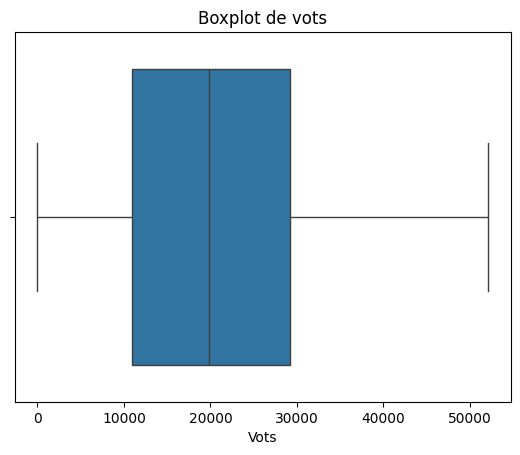

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=df_clean["Vots"])
plt.title("Boxplot de vots")
plt.show()


Com podem veure, no ens trobem cap valor extrem com podria ser el 999.999, així doncs, no cal eliminar cap valor.

# Exercici 3.4

En la meva opinió, les correccións addicionals que s'haurien de fer serien les següents:

1.   Verificar si hi ha files duplicades i eliminar-les si és el cas.
1.   Verificar que les URL dels enllaços són correctes.


In [ ]:
# Eliminar duplicats
df_clean = df_clean.drop_duplicates()

# Comprovar que les URL de la variable Enllaç comencen per https://www.reddit.com/.
df_clean = df_clean[df_clean["Enllaç\r"].str.startswith("https://www.reddit.com/")]

# 4. Anàlisi de les dades

# Exercici 4.1

*   **Model Supervisat:** Predir si una publicació té molts vots.

Podem crear una variable binària que indiqui si una publicació ha tingut més o menys vots que la mitjana, i aplicar un model de classificació com per exemple "Logistic Regression":

*   **Model No Supervisat:** Agrupació per subreddit i vots.

Amb K-Means podem intentar agrupar les publicacions en funció del nombre de vots i una codificació del subreddit.

A continuació implementaré els dos models per finalment poder comentar els resultats obtinguts:

In [ ]:
# Model supervisat:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Dataset carregat prèviament
df['Vots'] = pd.to_numeric(df['Vots'], errors='coerce')
df = df.dropna(subset=['Vots'])

# Crear una variable binària (per sobre de la mitjana)
threshold = df['Vots'].mean()
df['AltaPopularitat'] = (df['Vots'] > threshold).astype(int)

# Codificació de variables categòriques
df_encoded = pd.get_dummies(df[['Subreddit', 'Autor']], drop_first=True)

# Dades d'entrada i sortida
X = df_encoded
y = df['AltaPopularitat']

# Separar entrenament i test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Entrenar model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Resultats
y_pred = model.predict(X_test)
print("Informe de classificació:\n", classification_report(y_test, y_pred))


Informe de classificació:
               precision    recall  f1-score   support

           0       0.44      1.00      0.62         4
           1       0.00      0.00      0.00         5

    accuracy                           0.44         9
   macro avg       0.22      0.50      0.31         9
weighted avg       0.20      0.44      0.27         9



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


El model supervisat de classificació logística no ha mostrat un rendiment satisfactori. Amb només 29 observacions i un nombre elevat de variables categòriques, el model no aconsegueix identificar correctament les publicacions amb alta popularitat. El fet que no hagi fet cap predicció per a la classe positiva evidencia problemes greus de desequilibri i sobreajustament. Per millorar el rendiment caldria probablement tenir una mostra més gran.

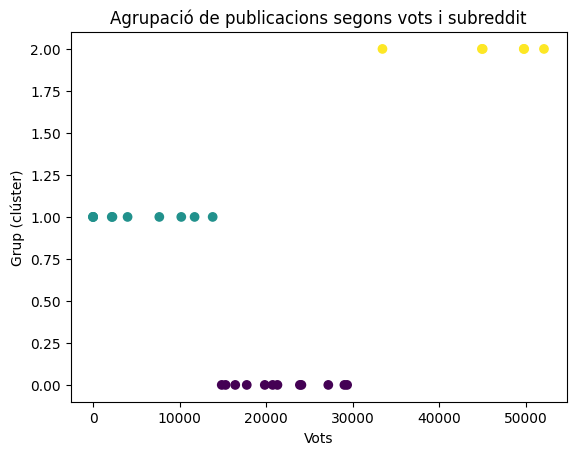

In [ ]:
# Model no supervisat:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Agrupació basada en vots i subreddit codificat
df_cluster = df[['Vots', 'Subreddit']]
df_cluster = df_cluster.dropna()

# Codificació
df_cluster_encoded = pd.get_dummies(df_cluster, columns=['Subreddit'], drop_first=True)

# Escalat
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_cluster_encoded)

# Model KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Visualització bàsica (si només es volen veure agrupaments)
plt.scatter(df['Vots'], df['Cluster'], c=df['Cluster'], cmap='viridis')
plt.xlabel("Vots")
plt.ylabel("Grup (clúster)")
plt.title("Agrupació de publicacions segons vots i subreddit")
plt.show()

En el model no supervisat s'ha aplicat K-Means amb 3 clústers, emprant com a variables els vots i el subreddit. El resultat mostra una agrupació clara basada en el nombre de vots, amb tres segments diferenciats: publicacions amb pocs vots, amb vots mitjans i amb vots molt elevats. Això indica que la variable “vots” té un pes decisiu en l’estructura de les dades. Tot i haver inclòs la informació del subreddit, sembla que no ha tingut un impacte rellevant en la formació dels clústers. Aquest resultat pot servir per caracteritzar millor els tipus de publicacions segons la seva popularitat.

# Exercici 4.2

Hipòtesi: Les publicacions del subreddit més popular tenen més vots que la resta.

Per comprobar aquesta hipòtesi, haurem de seguir els següents passos:

*   Trobar el subreddit més popular.
*   Fer un seguit de proves prèvies com ara separar en grups per popularitat, veure si hi ha normalitat o no, o veure la homogeneitat de variàncies.
*   T-test (si normalitat OK) o Mann-Whitney (si no)

In [ ]:
# Trobar el subreddit més popular:
subreddit_popular = df['Subreddit'].value_counts().idxmax()
df['EsPopular'] = (df['Subreddit'] == subreddit_popular).astype(int)

# Proves prèvies:
from scipy.stats import shapiro, levene

# Separació de grups
vots_popular = df[df['EsPopular'] == 1]['Vots']
vots_resta = df[df['EsPopular'] == 0]['Vots']

# Normalitat
print("Shapiro subreddit popular:", shapiro(vots_popular))
print("Shapiro resta:", shapiro(vots_resta))

# Homogeneïtat de variàncies
print("Levene test:", levene(vots_popular, vots_resta))

Shapiro subreddit popular: ShapiroResult(statistic=np.float64(nan), pvalue=np.float64(nan))
Shapiro resta: ShapiroResult(statistic=np.float64(0.9235362913209364), pvalue=np.float64(0.05445149803450322))
Levene test: LeveneResult(statistic=np.float64(0.11024984000604816), pvalue=np.float64(0.7425218374104374))


<ipython-input-20-1e0734634b5a>:13: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  print("Shapiro subreddit popular:", shapiro(vots_popular))


Com veiem, la mostra és massa petita, així doncs, ens decantarem per utilitzar una prova Mann-Whitney U ja que aquesta prova no assumeix normalitat i, a més, és adequada quan la mida de la mostra és petita, com en aquest cas.

In [ ]:
# Mann-Whitney U test:
from scipy.stats import mannwhitneyu

# vots_popular = vots del subreddit que vols comparar
# vots_resta = vots dels altres subreddits

stat, p = mannwhitneyu(vots_popular, vots_resta, alternative='two-sided')
print("Mann-Whitney U Test:")
print("Estadístic:", stat)
print("p-valor:", p)


Mann-Whitney U Test:
Estadístic: 33.0
p-valor: 0.582010582010582


Com a comentari final, diré que s'ha aplicat la prova de Mann-Whitney U per comparar el nombre de vots entre les publicacions del subreddit popular i la resta de subreddits. El resultat (U = 33.0, p = 0.582) indica que no s’observa una diferència estadísticament significativa entre ambdós grups (amb un nivell de significació del 5%). Això suggereix que, en aquesta mostra, el subreddit no sembla influir significativament en la quantitat de vots rebuts per una publicació.

# 5. Representació dels resultats:

Tal i com s'especifica en l'enunciat, aquest apartat l'he anat desenvolupant al llarg de la pràctica, ja que desprès de cada prova o anàlisi realitzat, s'han mostrat els resultats obtinguts.

# 6. Resolució del problema:

A partir de l'anàlisi de les 50 publicacions més populars de Reddit (r/popular), s'han aplicat diferents tècniques de tractament i anàlisi de dades amb l'objectiu de descobrir patrons i relacions entre variables com el nombre de vots, el subreddit, o l'autor de les publicacions.

A partir de l'elaboració d'aquesta pràctica, les conclusions principals que puc extreure són les següents:

1.   **Exploració inicial i visualització:**

Les variables recollides (títol, subreddit, autor, vots i enllaç) mostren una gran variabilitat, especialment en el nombre de vots, amb valors que oscil·len entre menys de 1.000 i més de 50.000.

No tots els subreddits tenen el mateix pes o impacte pel que fa a interaccions.

2.   **Model supervisat (classificació):**

El model aplicat (classificador binari) presenta un rendiment molt baix (precisió 0.44, f1-score 0.27), indicant que les dades disponibles no són suficients o prou representatives per predir correctament si una publicació tindrà molts o pocs vots.

A més, el desbalanceig en la mida de la mostra afecta clarament la qualitat del model predictiu.

3.   **Model no supervisat (clústers):**

Amb k-means s’han identificat tres grups diferenciats de publicacions, segons el nombre de vots. Això indica que hi ha patrons que permeten agrupar les publicacions en funció de la seva popularitat, tot i que no necessàriament estan relacionats amb el subreddit.

4.   **Contrast d'hipòtesis:**

Després de comprovar la normalitat i homocedasticitat, s'ha aplicat la prova de Mann-Whitney U per contrastar si hi havia diferències significatives entre els vots de publicacions del subreddit més popular i la resta.

El resultat (p = 0.582) mostra que no hi ha una diferència significativa, per tant, el subreddit per si sol no sembla condicionar el nombre de vots.

**Responen els resultats al problema?**

En certa forma, considero que sí, els resultats aporten una resposta parcial però informativa, extreient les següents conclusions:

No s’ha pogut construir un model predictiu robust per anticipar la popularitat d’una publicació.

Tanmateix, l’anàlisi ha permès identificar agrupacions i descartar que el subreddit sigui un factor determinant en el nombre de vots.

# 7. Codi

El codi utilitzat (en Python) durant tota aquesta pràctica s'ha anat adjuntant exercici rere exercici.

# 8. Vídeo

El vídeo explicatiu que exigeix la pràctica s'adjuntara juntament amb l'entrega d'aquest pdf. 